In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.io import wavfile
import time

In [3]:
samplerate, data = wavfile.read('../data/Ultrasonic_-_Slap_House_Essentials_-_Clap_04.wav')

/tmp/ipykernel_9256/3351567344.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('./data/Ultrasonic_-_Slap_House_Essentials_-_Clap_04.wav')


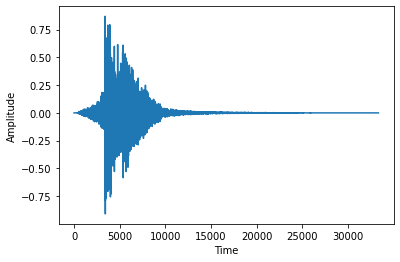

In [4]:
plt.plot(data[:,1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

In [21]:
def FFT_1d_naive(x):
    N = len(x)
    if N % 2 > 0:
        raise ValueError("length must be a power of 2")
    elif N <= 2:
        n = np.arange(N)
        k = n.reshape((N, 1))
        M = np.exp(-2j * np.pi * k * n / N)
        return np.dot(M, x)
    else:
        X_even = FFT_1d_naive(x[::2])
        X_odd = FFT_1d_naive(x[1::2])
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + terms[:int(N/2)] * X_odd,
                               X_even + terms[int(N/2):] * X_odd])
        

In [30]:
start_time = time.time()
X = FFT_1d_naive(data[:2**15,0])
print(time.time()-start_time,"s")

0.5882930755615234 s


In [33]:
sr = samplerate

xdft = X[0:int(len(X)/2+1)]

DF = sr/len(X)
freq = np.arange(0,sr/2+1,DF)

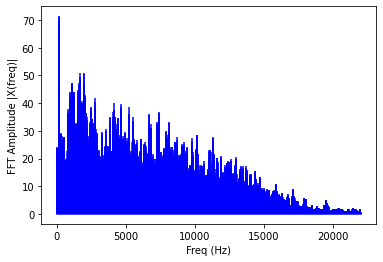

In [34]:
plt.stem(freq, abs(xdft),linefmt='b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [49]:
from scipy import fft

start_time = time.time()
X = fft.fft(data[:,0])
print(time.time()-start_time,"s")

0.004702091217041016 s


In [44]:
sr = samplerate

xdft = X[0:int(len(X)/2+1)]

DF = sr/len(X)
freq = np.arange(0,sr/2,DF)

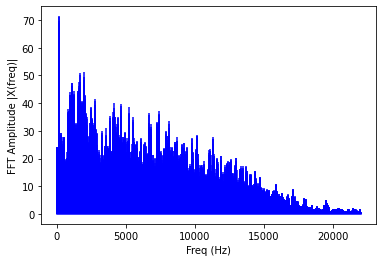

In [45]:
plt.stem(freq, abs(xdft),linefmt='b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()